In [1]:
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
filename = "dataset/cifar-10-batches-py/batches.meta"
a = unpickle(filename)
filename = "dataset/cifar-10-batches-py/data_batch_1"
batch_1 = unpickle(filename)

In [3]:
a

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [4]:
print(batch_1[b'batch_label'])
batch_1.keys()

b'training batch 1 of 5'


dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

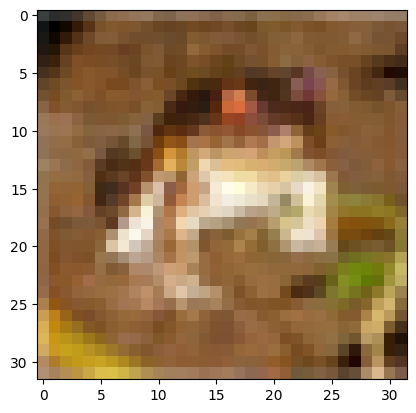

In [5]:
from matplotlib import pyplot as plt
image = batch_1[b'data'][0].reshape(3, 32, 32).transpose(1, 2, 0)
plt.imshow(image)

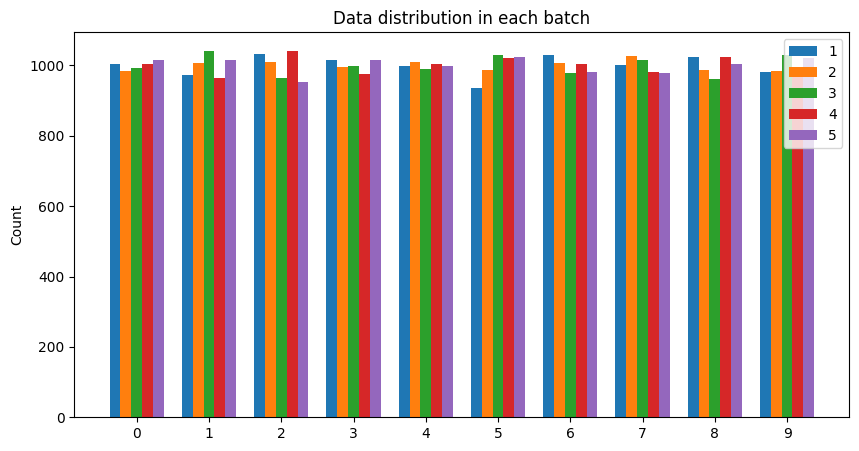

In [31]:
import numpy as np
from glob import glob
import os
dir_path = "dataset/cifar-10-batches-py/"
all_batch = glob(os.path.join(dir_path, "data_batch_*"))
all_count = []
bar_width = 0.15
plt.figure(figsize=(10, 5))
for i, b in enumerate(all_batch):
    label = unpickle(b)[b'labels']
    values, counts = np.unique(label, return_counts=True)
    plt.bar(np.arange(10) + (i -2) * bar_width, counts, width=bar_width, label=b[-1])
plt.legend()
plt.title('Data distribution in each batch')
plt.xticks(np.arange(10))
plt.ylabel('Count')
plt.savefig("data_distribution.svg")
# import numpy as np
# label = np.array(label)
# print(label.max())
# print(label.min())